Εργασία 1

Δανάη Πασχαλιά Παπαδοπούλου 1115202000166

Χριστίνα Κοκκινάκη 1115202000083

Στο συγκεκριμένο notebook απαντώνται όλα τα ερωτήματα της εκφώνισης.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [4]:
keywords = ['id', 'zipcode', 'transit', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
            'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable',
            'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic',
            'first_review', 'description', 'city', 'cancellation_policy', 'bed_type', 'bathrooms',
            'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365',
            'minimum_nights']

feb2019 = pd.read_csv('/content/drive/MyDrive/data/2019/febrouary/listings.csv', usecols=keywords)
mar2019 = pd.read_csv('/content/drive/MyDrive/data/2019/march/listings.csv', usecols=keywords)
apr2019 = pd.read_csv('/content/drive/MyDrive/data/2019/april/listings.csv', usecols=keywords)

feb2019['month'] = 'feb'
mar2019['month'] = 'mar'
apr2019['month'] = 'apr'

months2019 = []
months2019.append(feb2019)
months2019.append(mar2019)
months2019.append(apr2019)

listings2019 = pd.concat(months2019, ignore_index=True)

# Αφαίρεση του '$' από τα δεδομένα της στήλης price
listings2019['price'] = listings2019['price'].str.replace('$', '').str.replace(',', '').astype(float)

In [5]:
keywords = ['id', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews',
            'neighbourhood', 'name', 'latitude', 'longitude', 'last_review', 'instant_bookable',
            'host_since', 'host_response_rate', 'host_identity_verified', 'host_has_profile_pic',
            'first_review', 'description', 'bathrooms_text',
            'accommodates', 'amenities', 'room_type', 'property_type', 'price', 'availability_365',
            'minimum_nights']


jun2023 = pd.read_csv('/content/drive/MyDrive/data/2023/june/listings.csv', usecols=keywords)
mar2023 = pd.read_csv('/content/drive/MyDrive/data/2023/march/listings.csv', usecols=keywords)
sep2023 = pd.read_csv('/content/drive/MyDrive/data/2023/september/listings.csv', usecols=keywords)


mar2023['month'] = 'mar'
jun2023['month'] = 'jun'
sep2023['month'] = 'sep'

months2023 = []
months2023.append(mar2023)
months2023.append(jun2023)
months2023.append(sep2023)

listings2023 = pd.concat(months2023, ignore_index=True)


# Αφαίρεση του '$' από τα δεδομένα της στήλης price
listings2023['price'] = listings2023['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Αφαίρεση των κενών τιμών NaN (συνολικά 18 γραμμές)
listings2023 = listings2023.dropna(subset=['bathrooms_text'])

#Αφαίρεση των strings από τα δεδομένα της στήλης bathrooms_text
listings2023.loc[:, 'bathrooms_text'] = listings2023['bathrooms_text'].str.replace(r'\D+', '', regex=True)
listings2023.loc[:, 'bathrooms_text'] = listings2023['bathrooms_text'].replace('', 0.5)  #Σε κάποια κελιά υπήρχαν οι τιμές "Half-Bath" "Private Half-Bath" και τις αντικαθιστούμε με 0.5
listings2023.loc[:, 'bathrooms_text'] = listings2023['bathrooms_text'].astype(float)

#Μετονομασία στήλης bathrooms_text σε bathrooms
listings2023 = listings2023.rename(columns={'bathrooms_text': 'bathrooms'})

In [6]:
# Φτιάχνουμε dataframe για το 2023 με το listings0.csv

mar23 = pd.read_csv("/content/drive/MyDrive/data/2023/march/listings0.csv")
jun23 = pd.read_csv("/content/drive/MyDrive/data/2023/june/listings0.csv")
sep23 = pd.read_csv("/content/drive/MyDrive/data/2023/september/listings0.csv")
mar23['month'] = 'mar'
jun23['month'] = 'jun'
sep23['month'] = 'sep'

months23 = []
months23.append(mar23)
months23.append(jun23)
months23.append(sep23)

listings0_23 = pd.concat(months23, ignore_index=True)

In [7]:
# Αντικατάσταση των τιμών των neighbourhood του listings2023 με τις αντίστοιχες (βάση το id) του listings0_23

for id in listings2023['id']:
  id_exists = (listings0_23['id'] == id).any() # 'Ελεγχος ύπαρξης του id που πήραμε απ' το lisings2023 στο listings0_23
  if id_exists:
    neighbourhood_list = listings0_23['neighbourhood'].loc[listings0_23['id'] == id] # Παίρνουμε το set των γειτονιών με αυτό το id
    neighbourhood_index = neighbourhood_list.first_valid_index() # Για το set από γειτονιές παίρνουμε το index κάποιας non-NaN γειτονιάς
    if neighbourhood_index is not None: # Αν υπάρχει non-NaN γειτονιά:
      neighbourhood = neighbourhood_list[neighbourhood_index] # Την αποθηκεύουμε στο neighbourhood
      listings2023.loc[listings2023['id'] == id, 'neighbourhood'] = neighbourhood


In [8]:
#Συμπληρώνουμε τιμές που λείπουν σε γραμμές για κάποιους μήνες με τις αντίστοιχες των άλλων μηνών που δεν είναι κενή η συγκεκριμένη τιμή όπου αυτό είναι δυνατό

missing_data = listings2019.isnull().sum()
missing_data = missing_data[missing_data != 0] #Δείχνει το πόσες τιμές λείπουν (εχουν αφαιρεθεί οι μηδενικές)
nan_col = missing_data[missing_data > 0].index.tolist() #Ονοματα στηλών με nan τιμές

keywords = ['name', 'transit', 'neighbourhood', 'city', 'zipcode', 'first_review', 'host_since'] #Διαλέγουμε μόνο τις στήλες που η τιμή τους για ένα airbnb παραμένει ίδια για κάθε μήνα

for col in nan_col:
  if col in keywords:
    rows_with_missing_col = listings2019.loc[listings2019[col].isnull()]
    ids = rows_with_missing_col['id'].tolist()  # ids αυτων που η στήλη col έχει nan

    id_row_pairs = []
    for index, row in listings2019.iterrows():
      if row['id'] in ids:
        id_row_pairs.append((row['id'], index)) #Κρατάμε τα ids και την σειρά στην οποία βρίκεται η γραμμή στο .csv

    id_row_pairs = list(set(id_row_pairs)) # Αφαίρεση διπλοτύπων

    for id,index in id_row_pairs:

      specific_row = listings2019[listings2019['id'] == id]  #Παίρνουμε τις γραμμές για το id για τα οποία λείπει η τιμή στο col
      specific_row = specific_row.dropna(subset=[col]) #Για να κραταμε τις γραμμές με αυτο το id και οχι Nan στην στήλη
      specific_row_nan = specific_row.loc[specific_row[col].isna()] #Για να κραταμε τις γραμμες με αυτο το id και Nan στην στήλη

      if(len(specific_row) != 0): #Αν υπάρχει γραμμή με αυτό το id που να εχει τιμή στην στήλη
        value = specific_row[col].values[0]
        listings2019.loc[index,col] = value

In [9]:
#Συμπληρώνουμε τιμές που λείπουν σε γραμμές για κάποιους μήνες με τις αντίστοιχες των άλλων μηνών που δεν είναι κενή η συγκεκριμένη τιμή όπου αυτό είναι δυνατό

missing_data = listings2023.isnull().sum()
missing_data = missing_data[missing_data != 0] #Δείχνει το πόσες τιμές λείπουν (εχουν αφαιρεθεί οι μηδενικές)
nan_col = missing_data[missing_data > 0].index.tolist() #Ονοματα στηλών με nan τιμές

keywords = ['name', 'host_since', 'neighbourhood', 'first_review'] #Διαλέγουμε μόνο τις στήλες που η τιμή τους για ένα airbnb παραμένει ίδια για κάθε μήνα

for col in nan_col:
  if col in keywords:
    rows_with_missing_col = listings2023.loc[listings2023[col].isnull()]
    ids = rows_with_missing_col['id'].tolist()  # ids αυτων που η στήλη col έχει nan

    id_row_pairs = []
    for index, row in listings2023.iterrows():
      if row['id'] in ids:
        id_row_pairs.append((row['id'], index)) #Κρατάμε τα ids και την σειρά στην οποία βρίκεται η γραμμή στο .csv

    id_row_pairs = list(set(id_row_pairs)) # Αφαίρεση διπλοτύπων

    for id,index in id_row_pairs:

      specific_row = listings2023[listings2023['id'] == id]  #Παίρνουμε τις γραμμές για το id για τα οποία λείπει η τιμή στο col
      specific_row = specific_row.dropna(subset=[col]) #Για να κραταμε τις γραμμές με αυτο το id και οχι Nan στην στήλη
      specific_row_nan = specific_row.loc[specific_row[col].isna()] #Για να κραταμε τις γραμμες με αυτο το id και Nan στην στήλη

      if(len(specific_row) != 0): #Αν υπάρχει γραμμή με αυτό το id που να εχει τιμή στην στήλη
        value = specific_row[col].values[0]
        listings2023.loc[index,col] = value


In [10]:
#Εκκαθάριση δεδομένων (strings)

#Μετατροπή κεφαλαίων γραμμάτων σε πεζά
listings2023['neighbourhood'] = listings2023['neighbourhood'].apply(lambda x: x.lower() if isinstance(x, str) else x)
listings2019['neighbourhood'] = listings2019['neighbourhood'].apply(lambda x: x.lower() if isinstance(x, str) else x)

listings2023['amenities'] = listings2023['amenities'].apply(lambda x: x.lower() if isinstance(x, str) else x)
listings2019['amenities'] = listings2019['amenities'].apply(lambda x: x.lower() if isinstance(x, str) else x)

listings2023['name'] = listings2023['name'].apply(lambda x: x.lower() if isinstance(x, str) else x)
listings2019['name'] = listings2019['name'].apply(lambda x: x.lower() if isinstance(x, str) else x)


#Εκκαθάριση γειτονιών που είναι γραμμένες στα αγγλικά

listings2023['neighbourhood'] = listings2023['neighbourhood'].replace(['αθήνα, greece','αθήνα, attica, greece','athina, greece','athina, attica, greece','athens, greece'], 'αθήνα')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('zografou, greece', 'ζωγράφου')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('kesariani, greece', 'καισαριανή')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('vironas, greece', 'βύρωνας')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('kallithea, greece', 'καλλιθέα')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('athens, acropolis & koukaki, greece', 'κουκάκι-μακρυγιάννη')
listings2023['neighbourhood'] = listings2023['neighbourhood'].replace('ampelokipoi, athens, greece', 'αμπελόκηποι')

In [11]:
#Από τις στήλες με αριθμητικές τιμές ('accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'price'), μόνο οι "bedrooms" και "beds" περιέχουν NaN τιμές (και στις δύο χρονιές)
#Αυτές οι γραμμές θα αφαιρεθούν.

#Για το 2019 αφαιρούνται 40 από τις 28122 συνολικές γραμμές (0.14 % των συνολικών γραμμών):
listings2019.dropna(subset=['bedrooms', 'beds'], inplace=True)

#Για το 2023 αφαιρούνται 3,903 από τις 36664 συνολικές γραμμές (10.6 % των συνολικών γραμμών):
listings2023.dropna(subset=['bedrooms', 'beds'], inplace=True)


In [12]:
#Αφαίρεση των γραμμών που περιέχουν ακραίες τιμές με τη μέθοδο z-score (threshold = 3)

num_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights']

#2019

outlier_indexes = []

for col in num_cols:
	data = listings2019[col]
	mean = np.mean(data)
	std = np.std(data)

	threshold = 3
	for index, row in listings2019.iterrows():
		value = row[col]
		z = (value-mean)/std
		if z > threshold or (value==0 and col in ['accommodates', 'minimum_nights']):
			outlier_indexes.append(index)

indexes = sorted(list(set(outlier_indexes)))
listings2019 = listings2019.drop(indexes)


#2023

outlier_indexes = []

for col in num_cols:
	data = listings2023[col]
	mean = np.mean(data)
	std = np.std(data)

	threshold = 3
	for index, row in listings2023.iterrows():
		value = row[col]
		z = (value-mean)/std
		if z > threshold  or (value==0 and col in ['accommodates', 'minimum_nights']):
			outlier_indexes.append(index)

indexes = sorted(list(set(outlier_indexes)))
listings2023 = listings2023.drop(indexes)

In [13]:
#Ακραίες τιμές για τη στήλη price:
#(Ως ακραίες θα θεωρηθούν οι τιμές μεγαλύτερες του 9000 και οι μηδενικές τιμές)

#2019

outlier_indexes = []
for index, row in listings2019.iterrows():
	value = row['price']
	if value <= 0  or value > 9000:
		outlier_indexes.append(index)

indexes = sorted(list(set(outlier_indexes)))
listings2019 = listings2019.drop(indexes)


#2023

outlier_indexes = []
for index, row in listings2023.iterrows():
	value = row['price']
	if value <= 0  or value > 9000:
		outlier_indexes.append(index)

indexes = sorted(list(set(outlier_indexes)))
listings2023 = listings2023.drop(indexes)

In [14]:
#Αποθήκευση dataframes σε αρχεία

listings2023.to_csv('train_2023.csv', index=False)
listings2019.to_csv('train_2019.csv', index=False)

In [15]:
#Λήψη δεδομένων από αρχεία

df_2023 = pd.read_csv('/content/train_2023.csv')
df_2019 = pd.read_csv('/content/train_2019.csv')

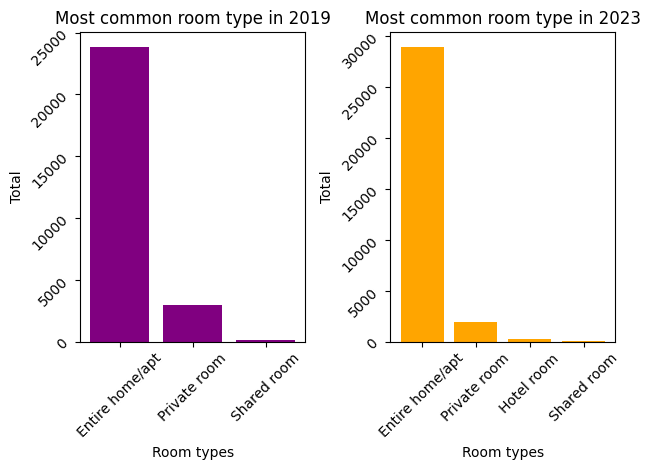

In [16]:
#Ερώτημα 1.1

fig, axs = plt.subplots(1, 2)

#2019

# Υπολογισμός συχνότερων room_type
room_types_2019 = df_2019['room_type'].value_counts()

# Δημιουργία ιστογράμματος
axs[0].bar(room_types_2019.index, room_types_2019.values, color='purple')
axs[0].set_title('Most common room type in 2019')
axs[0].set_xlabel('Room types')
axs[0].set_ylabel('Total')
axs[0].tick_params(rotation=45)

#2023

# Υπολογισμός συχνότερων room_type
room_types_2023 = df_2023['room_type'].value_counts()

# Δημιουργία ιστογράμματος
axs[1].bar(room_types_2023.index, room_types_2023.values, color='orange')
axs[1].set_title('Most common room type in 2023')
axs[1].set_xlabel('Room types')
axs[1].set_ylabel('Total')
axs[1].tick_params(rotation=45)

plt.tight_layout()

plt.show()

61.27109612875163 61.47753193430657 61.55936764211234


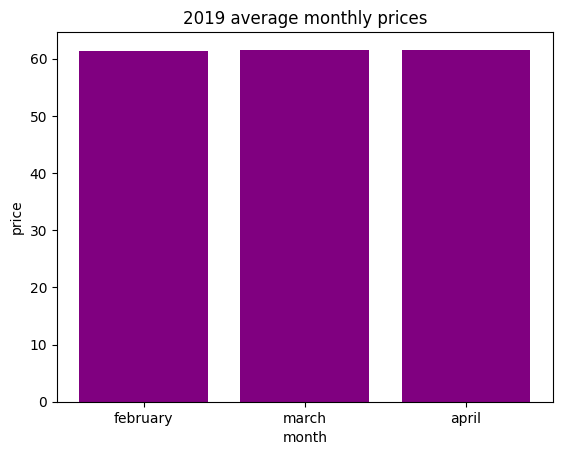

105.90927458148933 92.98906500802568 99.1875632416521


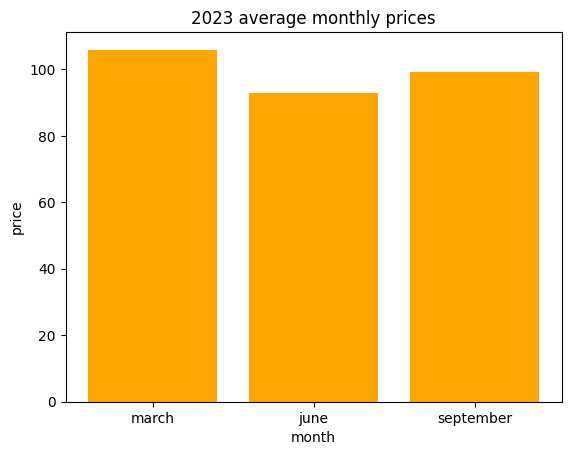

In [17]:
#Ερώτημα 1.2

#2019
price_mean_per_month = df_2019.groupby('month')['price'].mean()

mean_feb = price_mean_per_month[0]
mean_mar = price_mean_per_month[1]
mean_apr = price_mean_per_month[2]
print(mean_feb, mean_mar, mean_apr)

plt.bar(['february', 'march', 'april'], [mean_feb, mean_mar, mean_apr], color='purple')
plt.xlabel('month')
plt.ylabel('price')
plt.title('2019 average monthly prices')

plt.show()

#2023
price_mean_per_month = df_2023.groupby('month')['price'].mean()

mean_mar = price_mean_per_month[0]
mean_jun = price_mean_per_month[1]
mean_sep = price_mean_per_month[2]
print(mean_mar, mean_jun, mean_sep)

plt.bar(['march', 'june', 'september'], [mean_mar, mean_jun, mean_sep], color='orange')
plt.xlabel('month')
plt.ylabel('price')
plt.title('2023 average monthly prices')

plt.show()

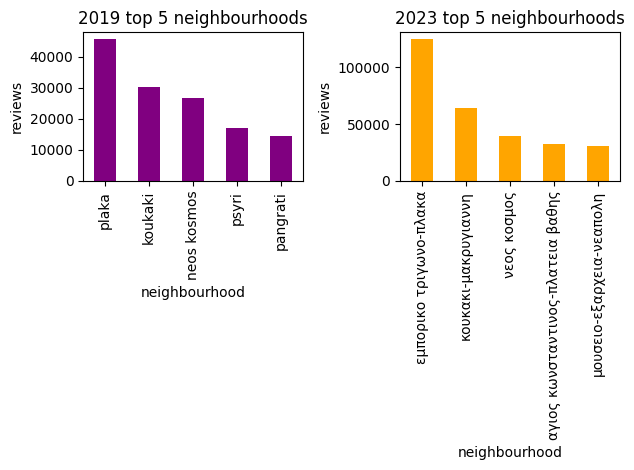

In [18]:
#Ερώτημα 1.3

fig, axs = plt.subplots(1, 2)

#2019
#Θα κρατήσουμε μόνο τις τιμές για τον Απρίλιο, αφού αυτός έχει τα πιο πρόσφατα δεδομένα για το 2019.
apr2019 = df_2019[df_2019['month'] == 'apr']
top_neighbourhoods = apr2019.groupby('neighbourhood')['number_of_reviews'].sum()
top5_neighbourhoods = top_neighbourhoods.nlargest(5)
top5_neighbourhoods.plot(kind='bar', color='purple', ax=axs[0])
axs[0].set_xlabel('neighbourhood')
axs[0].set_ylabel('reviews')
axs[0].set_title('2019 top 5 neighbourhoods')


#2023
#Θα κρατήσουμε μόνο τις τιμές για τον Σεπτέμβριο, αφού αυτός έχει τα πιο πρόσφατα δεδομένα για το 2023.
sep2023 = df_2023[df_2023['month'] == 'sep']
top_neighbourhoods = sep2023.groupby('neighbourhood')['number_of_reviews'].sum()
top5_neighbourhoods = top_neighbourhoods.nlargest(5)
top5_neighbourhoods.plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_xlabel('neighbourhood')
axs[1].set_ylabel('reviews')
axs[1].set_title('2023 top 5 neighbourhoods')


plt.tight_layout()
plt.show()


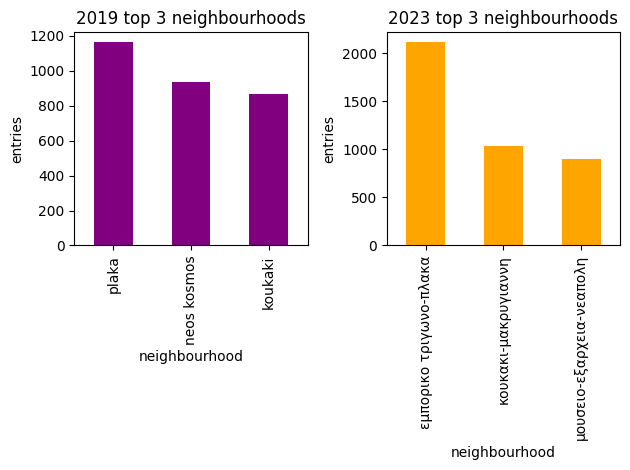

In [19]:
#Ερώτημα 1.4

fig, axs = plt.subplots(1, 2)

#2019

neighbourhood_buildings = df_2019.groupby('neighbourhood')['id'].nunique()
top3_neighbourhoods = neighbourhood_buildings.nlargest(3)
top3_neighbourhoods.plot(kind='bar', color='purple', ax=axs[0])
axs[0].set_xlabel('neighbourhood')
axs[0].set_ylabel('entries')
axs[0].set_title('2019 top 3 neighbourhoods')


#2023

neighbourhood_buildings = df_2023.groupby('neighbourhood')['id'].nunique()
top3_neighbourhoods = neighbourhood_buildings.nlargest(3)
top3_neighbourhoods.plot(kind='bar', color='orange', ax=axs[1])
axs[1].set_xlabel('neighbourhood')
axs[1].set_ylabel('entries')
axs[1].set_title('2023 top 3 neighbourhoods')


plt.tight_layout()
plt.show()

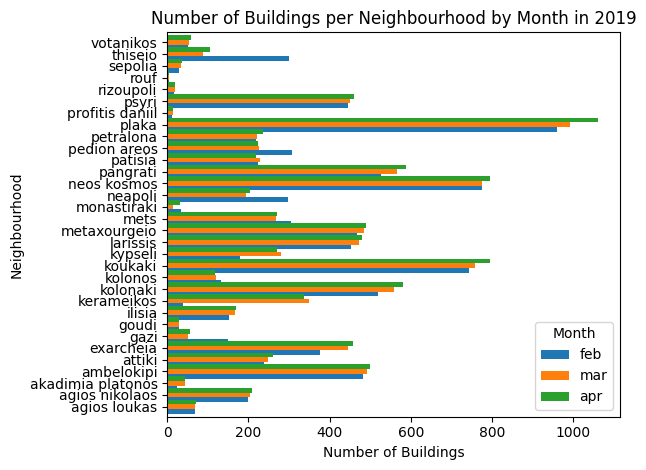

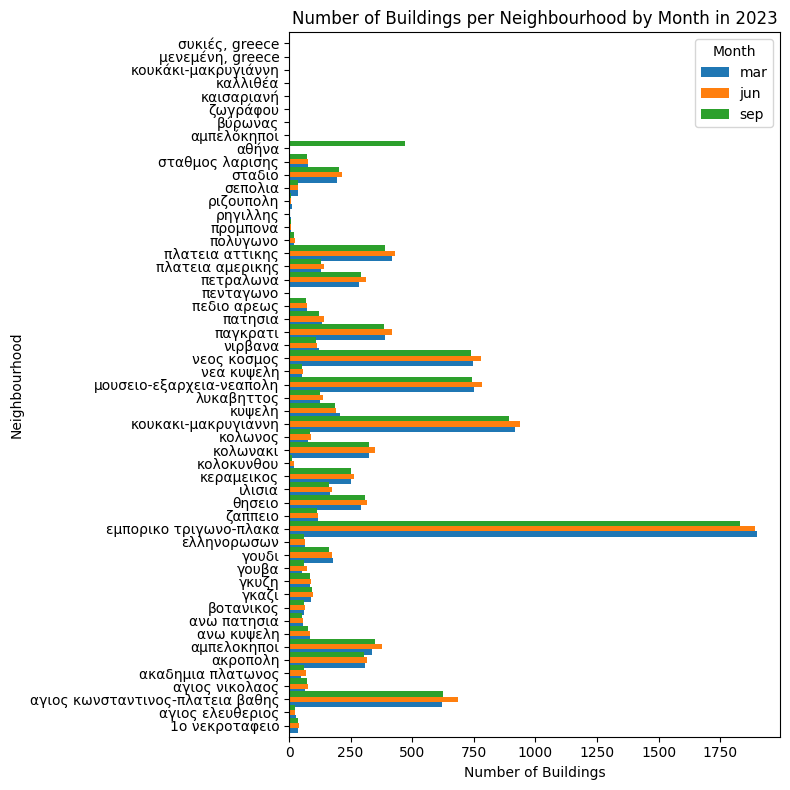

In [20]:
#Ερώτημα 1.5

#2019
#Αρχικά κρατάμε ξεχωριστά dataframes που περιέχουν τα δεδομένα του df_2019 για κάθε μήνα ξεχωριστά.
feb2019 = df_2019[df_2019['month'] == 'feb']
mar2019 = df_2019[df_2019['month'] == 'mar']
apr2019 = df_2019[df_2019['month'] == 'apr']
neighbourhood_buildings1 = feb2019.groupby('neighbourhood')['id'].nunique().rename('feb')
neighbourhood_buildings2 = mar2019.groupby('neighbourhood')['id'].nunique().rename('mar')
neighbourhood_buildings3 = apr2019.groupby('neighbourhood')['id'].nunique().rename('apr')

counts_combined = pd.concat([neighbourhood_buildings1, neighbourhood_buildings2, neighbourhood_buildings3], axis=1, sort=False)
counts_combined.plot(kind='barh', width=1.2)

plt.title('Number of Buildings per Neighbourhood by Month in 2019')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Buildings')
plt.xticks(rotation=0)

plt.legend(title='Month')
plt.tight_layout()
plt.show()


#2023
#Αρχικά κρατάμε ξεχωριστά dataframes που περιέχουν τα δεδομένα του df_2023 για κάθε μήνα ξεχωριστά.
mar2023 = df_2023[df_2023['month'] == 'mar']
jun2023 = df_2023[df_2023['month'] == 'jun']
sep2023 = df_2023[df_2023['month'] == 'sep']
neighbourhood_buildings1 = mar2023.groupby('neighbourhood')['id'].nunique().rename('mar')
neighbourhood_buildings2 = jun2023.groupby('neighbourhood')['id'].nunique().rename('jun')
neighbourhood_buildings3 = sep2023.groupby('neighbourhood')['id'].nunique().rename('sep')

counts_combined = pd.concat([neighbourhood_buildings1, neighbourhood_buildings2, neighbourhood_buildings3], axis=1, sort=False)
counts_combined.plot(kind='barh', figsize=(8, 8), width=1.2)

plt.title('Number of Buildings per Neighbourhood by Month in 2023')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Buildings')
plt.xticks(rotation=0)

plt.legend(title='Month')
plt.tight_layout()
plt.show()


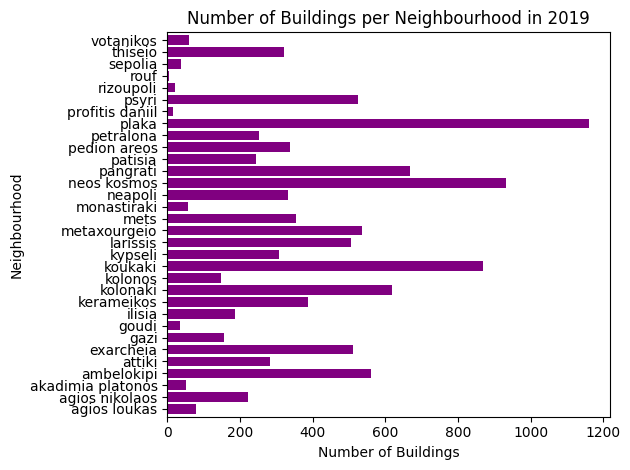

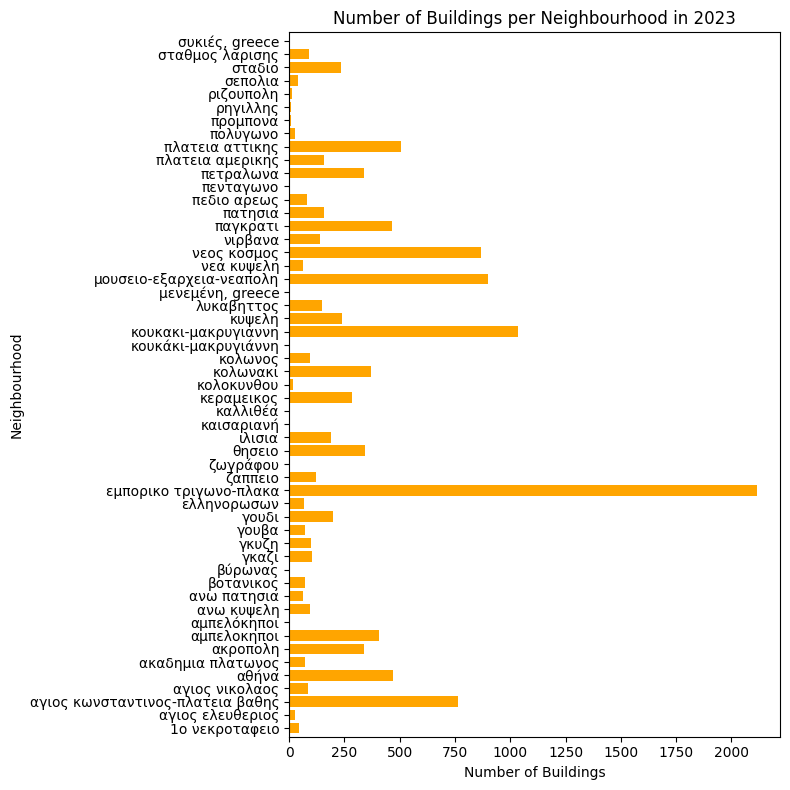

In [21]:
#Ερώτημα 1.6

#2019
neighbourhoods2019 = df_2019.groupby('neighbourhood')['id'].nunique()
neighbourhoods2019.plot(kind='barh', width=0.8, color='purple')

plt.title('Number of Buildings per Neighbourhood in 2019')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Buildings')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

#2023
neighbourhoods2023 = df_2023.groupby('neighbourhood')['id'].nunique()
neighbourhoods2023.plot(kind='barh', figsize=(8, 8), width=0.8, color='orange')

plt.title('Number of Buildings per Neighbourhood in 2023')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Buildings')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

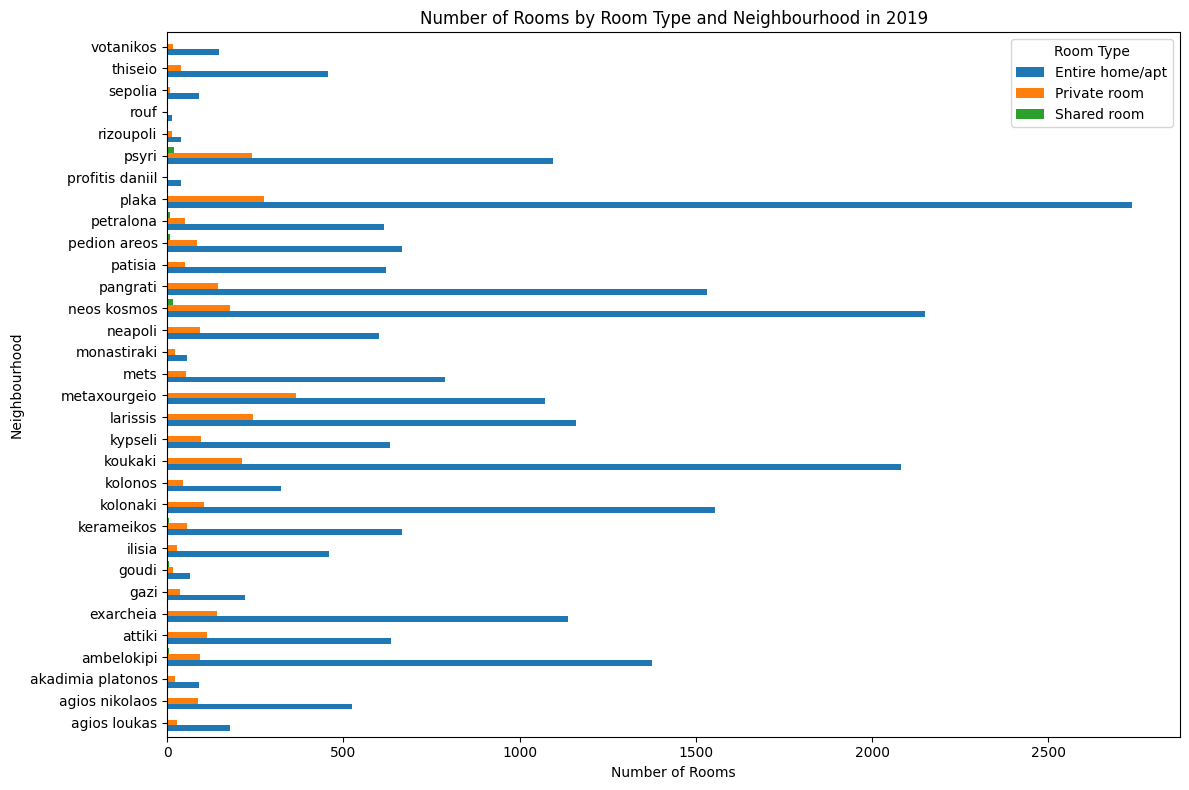

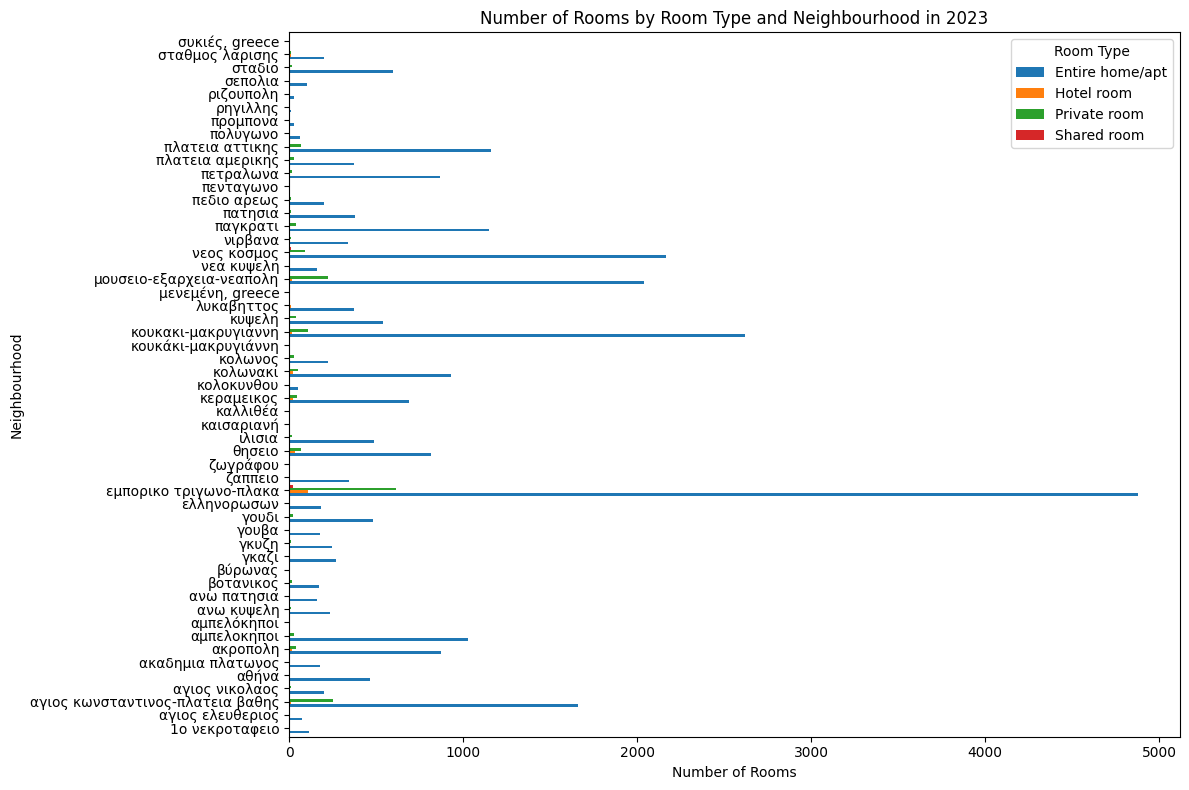

In [22]:
#Ερώτημα 1.7

#2019
room_types_2019 = df_2019.groupby(['neighbourhood','room_type']).size().unstack()
room_types_2019.plot(kind='barh', figsize=(12, 8), width=0.8)

plt.title('Number of Rooms by Room Type and Neighbourhood in 2019')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Rooms')
plt.xticks(rotation=0)

plt.legend(title='Room Type')
plt.tight_layout()
plt.show()

#2023
room_types_2023 = df_2023.groupby(['neighbourhood','room_type']).size().unstack()
room_types_2023.plot(kind='barh', figsize=(12, 8), width=0.8)

plt.title('Number of Rooms by Room Type and Neighbourhood in 2023')
plt.ylabel('Neighbourhood')
plt.xlabel('Number of Rooms')
plt.xticks(rotation=0)

plt.legend(title='Room Type')
plt.tight_layout()
plt.show()



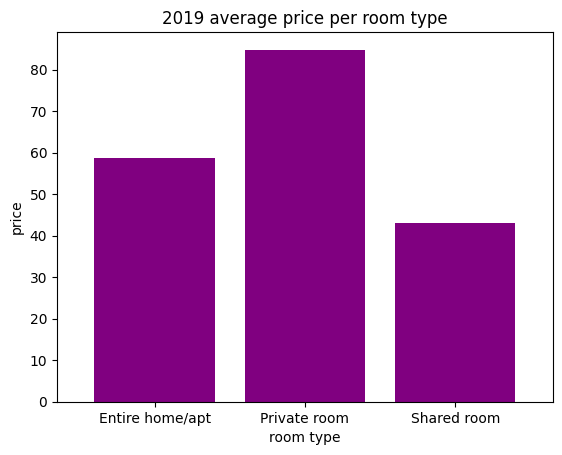

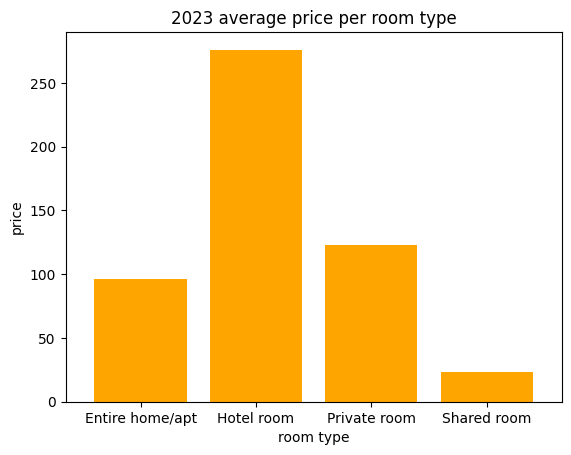

In [23]:
#Ερώτημα 1.8

#2019
price_mean_per_room_type = df_2019.groupby('room_type')['price'].mean()
price_2019 = price_mean_per_room_type.plot(kind='bar', width=0.8, color='purple')
plt.xlabel('room type')
plt.ylabel('price')
plt.title('2019 average price per room type')
plt.xticks(rotation=0)

plt.show()


#2023
price_mean_per_room_type = df_2023.groupby('room_type')['price'].mean()
price_2023 = price_mean_per_room_type.plot(kind='bar', width=0.8, color='orange')
plt.xlabel('room type')
plt.ylabel('price')
plt.title('2023 average price per room type')
plt.xticks(rotation=0)

plt.show()


In [24]:
# Ερώτημα 1.9

import folium
from IPython.display import IFrame

# Θα πάρουμε τα δεδομένα του Απριλίου
apr2019 = df_2019[df_2019['month'] == 'apr']
latitude_center = apr2019['latitude'].mean()
longitude_center = apr2019['longitude'].mean()
sampled_data = apr2019.sample(n=300, random_state=42) #Παίρνουμε τυχαία 300 γραμμές από το dataframe
map = folium.Map(location=[latitude_center, longitude_center], zoom_start=10)

for index, row in sampled_data.iterrows():
  latitude = row['latitude']
  longitude = row['longitude']
  popup_text = f"Name: {row['name']}<br><br>Type: {row['property_type']}<br><br>Accomodates: {row['accommodates']} people"

  folium.Marker([latitude, longitude], popup=popup_text).add_to(map)

map.save('map.html')
IFrame(src='map.html', width=700, height=600)

In [25]:
#Χρήση νέων dataframes για ερωτήματα με reviews

#2019

df_19_word_cloud = df_2019.copy()

#Δημιουργία νέου dataframe για τα last_reviews από το αρχείο reviews.csv και την στήλη comments
reviews_feb = pd.read_csv("/content/drive/MyDrive/data/2019/febrouary/reviews.csv")
reviews_mar = pd.read_csv("/content/drive/MyDrive/data/2019/march/reviews.csv")
reviews_apr = pd.read_csv("/content/drive/MyDrive/data/2019/april/reviews.csv")

reviews2019 = []
reviews2019.append(reviews_feb)
reviews2019.append(reviews_mar)
reviews2019.append(reviews_apr)

reviews2019 = pd.concat(reviews2019, ignore_index=True)

#Εύρεση των last_reviews

#Μετατροπή σε κατάλληλο τύπο δεδομένων
reviews2019['date'] = pd.to_datetime(reviews2019['date'])

#Ομαδοποίούμε σύμφωνα με το listing_id και κρατάμε την πιο πρόσφατη ημερομηνία
idx_most_recent = reviews2019.groupby('listing_id')['date'].idxmax()
most_recent_reviews_2019 = reviews2019.loc[idx_most_recent]

#2023

df_23_word_cloud = df_2023.copy()

#Δημιουργία νέου dataframe για τα last_reviews από το αρχείο reviews.csv και την στήλη comments
reviews_mar = pd.read_csv("/content/drive/MyDrive/data/2023/march/reviews.csv")
reviews_jun = pd.read_csv("/content/drive/MyDrive/data/2023/june/reviews.csv")
reviews_sep = pd.read_csv("/content/drive/MyDrive/data/2023/september/reviews.csv")

reviews2023 = []
reviews2023.append(reviews_feb)
reviews2023.append(reviews_mar)
reviews2023.append(reviews_apr)

reviews2023 = pd.concat(reviews2023, ignore_index=True)

#Εύρεση των last_reviews

#Μετατροπή σε κατάλληλο τύπο δεδομένων
reviews2023['date'] = pd.to_datetime(reviews2023['date'])

#Ομαδοποίούμε σύμφωνα με το listing_id και κρατάμε την πιο πρόσφατη ημερομηνία
idx_most_recent = reviews2023.groupby('listing_id')['date'].idxmax()
most_recent_reviews_2023 = reviews2023.loc[idx_most_recent]


In [26]:
#Αφαίρεση nan

#2019

df_19_word_cloud.dropna(subset=['neighbourhood', 'transit','description'], inplace=True)
most_recent_reviews_2019.dropna(subset=['comments'], inplace=True)

#2023

df_23_word_cloud.dropna(subset=['neighbourhood', 'description'], inplace=True)
most_recent_reviews_2023.dropna(subset=['comments'], inplace=True)

#Εκκαθάριση δεδομένων κειμένου

#Αφαίρεση non utf χαρακτήρων
def remove_non_utf(text):
  return re.sub(r'[^\x00-\x7F\u0391-\u03C9\u03CA-\u03CF]+', '', text)

#2019
df_19_word_cloud['neighbourhood'] = df_19_word_cloud['neighbourhood'].apply(remove_non_utf)
df_19_word_cloud['transit'] = df_19_word_cloud['transit'].apply(remove_non_utf)
df_19_word_cloud['description'] = df_19_word_cloud['description'].apply(remove_non_utf)
most_recent_reviews_2019['comments'] = most_recent_reviews_2019['comments'].apply(remove_non_utf)


#2023
df_23_word_cloud['neighbourhood'] = df_23_word_cloud['neighbourhood'].apply(remove_non_utf)
df_23_word_cloud['description'] = df_23_word_cloud['description'].apply(remove_non_utf)
most_recent_reviews_2023['comments'] = most_recent_reviews_2023['comments'].apply(remove_non_utf)

In [27]:
# Ερώτημα 1.10

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

#StopWords
nltk.download('stopwords')
nltk.download('punkt')

english_stopwords = set(stopwords.words('english'))
greek_stopwords = set(stopwords.words('greek'))

# Συνάρτηση για δημιουργία Word Cloud
def create_word_cloud(text, title):
  wordcloud = WordCloud(width = 800, height = 800,
              background_color ='white',
              stopwords = english_stopwords | greek_stopwords,
              min_font_size = 10).generate(text)

  # Εμφάνιση του Word Cloud
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.title(title, fontsize=20)

  plt.show()

# Δημιουργία Word Clouds
create_word_cloud(df_19_word_cloud['neighbourhood'].dropna().to_string(), "Neighbourhood 2019")
create_word_cloud(df_19_word_cloud['transit'].dropna().to_string(), "Transit 2019")
create_word_cloud(df_19_word_cloud['description'].dropna().to_string(), "Description 2019")
create_word_cloud(most_recent_reviews_2019['comments'].dropna().to_string(), "Last Review 2019")


#2023

# Δημιουργία Word Clouds
create_word_cloud(df_23_word_cloud['neighbourhood'].dropna().to_string(), "Neighbourhood 2023")
create_word_cloud(df_23_word_cloud['description'].dropna().to_string(), "Description 2023")
create_word_cloud(most_recent_reviews_2019['comments'].dropna().to_string(), "Last Review 2023")


Output hidden; open in https://colab.research.google.com to view.

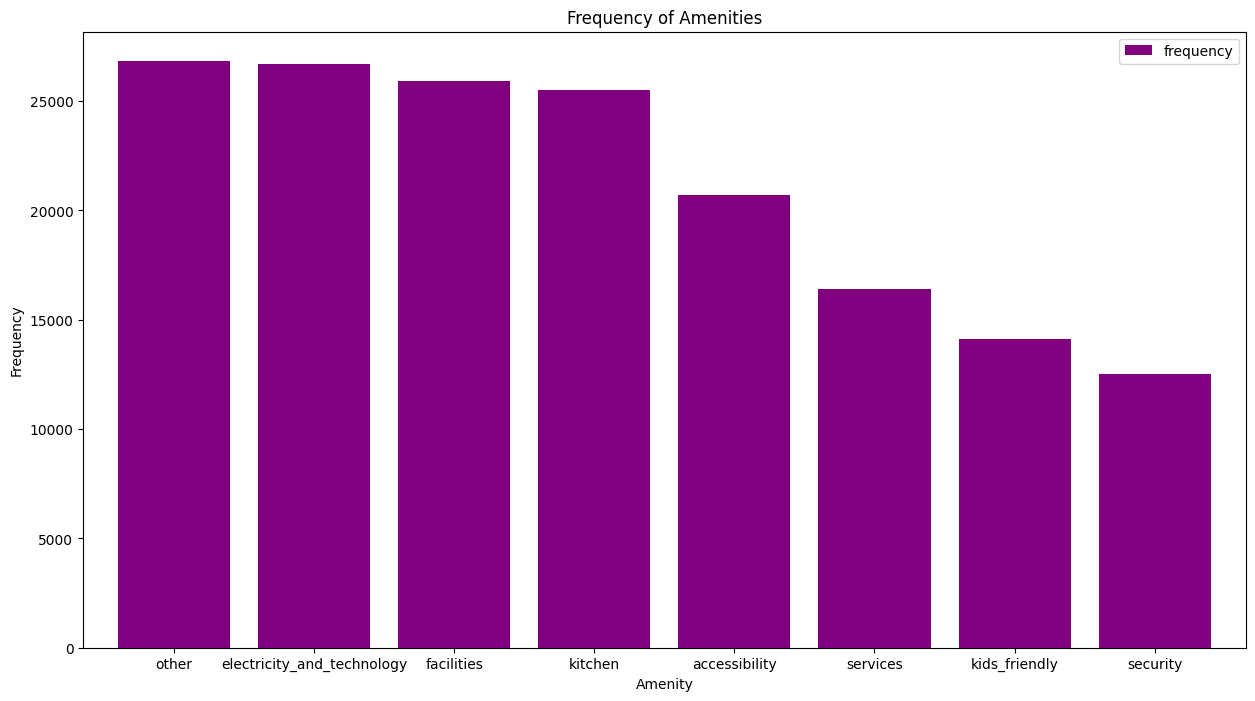

In [28]:
# Ερώτημα 1.11 - Το ερώτημα το υλοποιήσαμε μόνο για το 2019 σύμφωνα με συζήτηση στο Eclass

from collections import Counter

#Εκκαθάριση και διαχωρισμός των λέξεων
df_19_amenities = df_2019['amenities'].copy()
df_19_amenities.dropna(inplace=True)

def extract_tokens(text):
  tokens = re.findall(r'"([^"]*)"|(\w+)', text)
  return [token.strip() for tup in tokens for token in tup if token.strip()]

df_19_amenities = df_19_amenities.apply(extract_tokens)

unique_words = set([word for sublist in df_19_amenities for word in sublist])

#Κρατάμε τις 50 λέξεις που εμφανίζονται πιο συχνά στο 2019 για να τις κατηγοριοποιήσουμε
all_words = [word.strip() for sublist in df_19_amenities for word in sublist]
word_counts = Counter(all_words)
top_words = word_counts.most_common(50)

# Κατηγορίες
categories = {
  'kitchen': ['kitchen', 'oven', 'stove', 'refrigerator', 'microwave', 'coffee maker', 'cooking basics'],
  'accessibility': ['elevator', 'step-free access', 'wide doorway', 'wide hallway clearance', 'accessible-height bed', 'high chair'],
  'electricity_and_technology': ['air conditioning', 'wifi', 'tv', 'laptop friendly workspace'],
  'facilities': ['washer', 'dryer', 'iron', 'hair dryer', 'first aid kit', 'fire extinguisher'],
  'kids_friendly': ['crib', 'family/kid friendly', 'children’s books and toys', 'children’s dinnerware'],
  'security': ['smoke detector', 'carbon monoxide detector', 'lock on bedroom door'],
  'services': ['host greets you', 'luggage dropoff allowed', 'self check-in']
}

# Λίστα για την αποθήκευση των λέξεων με τις νέες κατηγορίες
grouped_words = {}

# Επανάληψη μέσω των λέξεων στο all_words
for word in all_words:
  found = False
  for category, words in categories.items():
    if word in words:
      grouped_words.setdefault(category, []).append((word))
      found = True
      break
  if not found:
    grouped_words.setdefault('other', []).append((word))

#Αντικατάσταση των λέξεων στο dataframe df_19_amenities με την αντίστοιχη κατηγορία

# Επιστρέφει σε ποια κατηγορία βρήσκεται κάθε λέξη
def map_word_to_category(word):
  for category, words in categories.items():
    if word in words:
      return category
  return 'other'

df_19_amenities = df_19_amenities.apply(lambda x: [map_word_to_category(word) for word in x])
df_19_amenities = df_19_amenities.apply(set)

#Κατασκευή ιστογράμματος
amenities_list = [item for sublist in df_19_amenities for item in sublist]
#Συχνότητα κατηγοριών
word_counts = Counter(amenities_list)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['frequency'])
word_counts_df = word_counts_df.sort_values(by='frequency', ascending=False)
word_counts_df.plot(kind='bar', width=0.8, color='purple',figsize=(15,8))

plt.xticks(rotation=0)
plt.title('Frequency of Amenities')
plt.xlabel('Amenity')
plt.ylabel('Frequency')
plt.show()

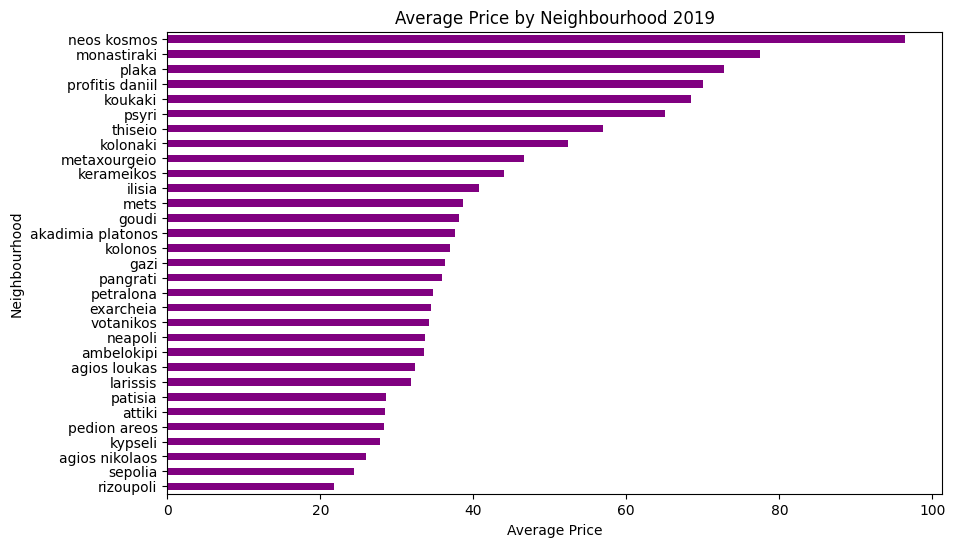

expensive: ['koukaki', 'monastiraki', 'neos kosmos', 'plaka', 'profitis daniil', 'psyri', 'thiseio']
average: ['agios loukas', 'akadimia platonos', 'ambelokipi', 'exarcheia', 'gazi', 'goudi', 'ilisia', 'kerameikos', 'kolonaki', 'kolonos', 'metaxourgeio', 'mets', 'neapoli', 'pangrati', 'petralona', 'votanikos']
affordable: ['agios nikolaos', 'attiki', 'kypseli', 'larissis', 'patisia', 'pedion areos', 'rizoupoli', 'sepolia']


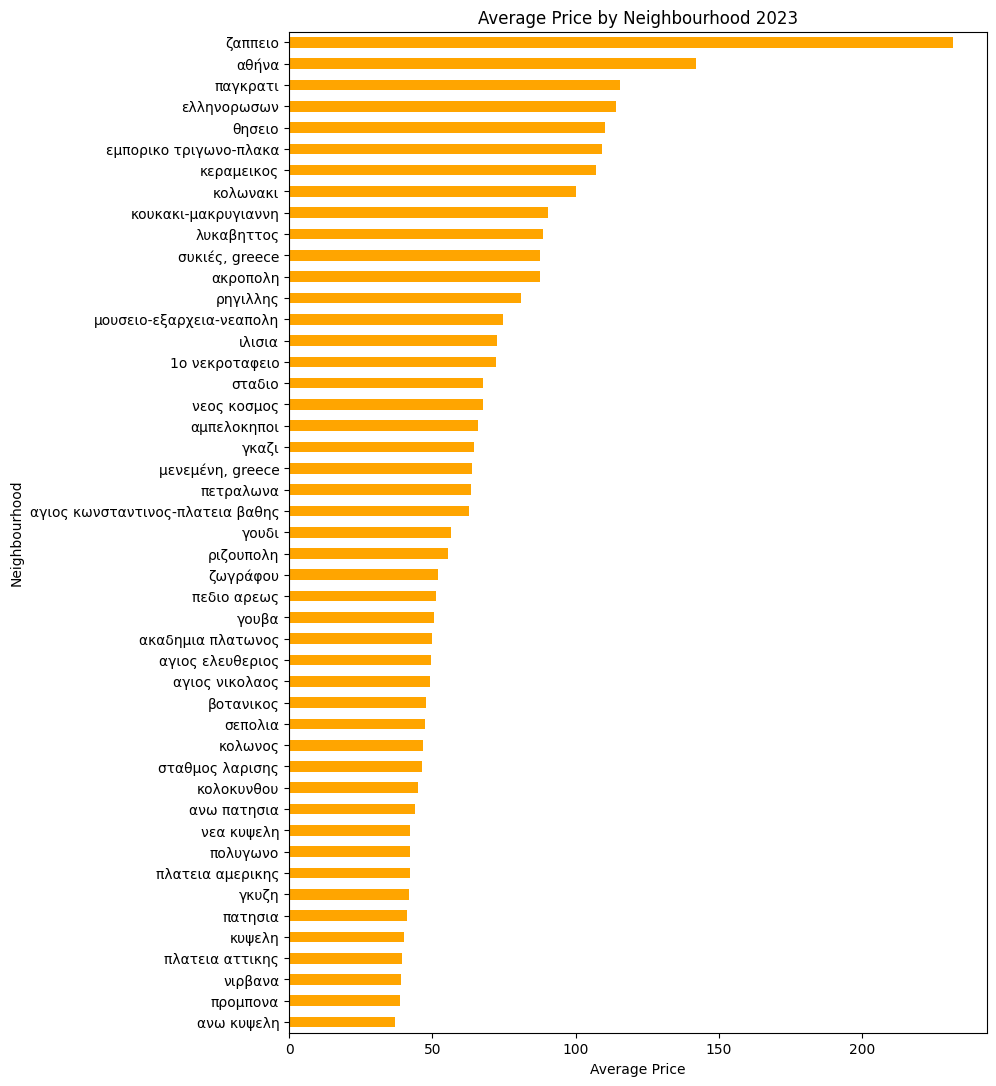

expensive: ['αθήνα', 'ακροπολη', 'ελληνορωσων', 'εμπορικο τριγωνο-πλακα', 'ζαππειο', 'θησειο', 'κεραμεικος', 'κολωνακι', 'κουκακι-μακρυγιαννη', 'λυκαβηττος', 'παγκρατι', 'συκιές, greece']
average: ['1ο νεκροταφειο', 'αγιος κωνσταντινος-πλατεια βαθης', 'αμπελοκηποι', 'γκαζι', 'γουδι', 'ζωγράφου', 'ιλισια', 'μενεμένη, greece', 'μουσειο-εξαρχεια-νεαπολη', 'νεος κοσμος', 'πετραλωνα', 'ρηγιλλης', 'ριζουπολη', 'σταδιο']
affordable: ['αγιος ελευθεριος', 'αγιος νικολαος', 'ακαδημια πλατωνος', 'ανω κυψελη', 'ανω πατησια', 'βοτανικος', 'γκυζη', 'γουβα', 'κολοκυνθου', 'κολωνος', 'κυψελη', 'νεα κυψελη', 'νιρβανα', 'πατησια', 'πεδιο αρεως', 'πλατεια αμερικης', 'πλατεια αττικης', 'πολυγωνο', 'προμπονα', 'σεπολια', 'σταθμος λαρισης']


In [29]:
# Ερώτημα 1.12

#2019
#Υπολογισμός μέσης τιμής ανα γειτονιά για accommodates = 2 (δωμάτια 2 ατόμων)
mean_2019 = df_2019[df_2019['accommodates']==2].groupby('neighbourhood')['price'].mean()

#Ταξινόμηση ανά μέση τιμή
sorted = mean_2019.sort_values()

#Κατασκευή γραφήματος
plt.figure(figsize=(10, 6))
sorted.plot(kind='barh',color='purple')
plt.title('Average Price by Neighbourhood 2019')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.xticks(rotation=0)
plt.show()

#Κατάταξη γειτονιών σύμφωνα με τον μέσο όρο
expensive = []
average = []
affordable = []
avg = mean_2019.mean()
for neighbourhood,price in mean_2019.items():
  if price > (avg*1.25):
    expensive.append(neighbourhood)
  elif price < (avg*0.75):
    affordable.append(neighbourhood)
  else:
    average.append(neighbourhood)


print('expensive:',expensive)
print('average:',average)
print('affordable:',affordable)


#2023

#Υπολογισμός μέσης τιμής ανα γειτονιά για accommodates = 2 (δωμάτια 2 ατόμων)
mean_2023 = df_2023[df_2023['accommodates']==2].groupby('neighbourhood')['price'].mean()

#Ταξινόμηση ανά μέση τιμή
sorted = mean_2023.sort_values()

#Κατασκευή γραφήματος
plt.figure(figsize=(10, 6))
sorted.plot(kind='barh',color='orange', figsize=(9, 13))
plt.title('Average Price by Neighbourhood 2023')
plt.ylabel('Neighbourhood')
plt.xlabel('Average Price')
plt.xticks(rotation=0)
plt.show()

#Κατάταξη γειτονιών σύμφωνα με τον μέσο όρο
expensive = []
average = []
affordable = []
avg = mean_2023.mean()
for neighbourhood,price in mean_2023.items():
  if price > (avg*1.25):
    expensive.append(neighbourhood)
  elif price < (avg*0.75):
    affordable.append(neighbourhood)
  else:
    average.append(neighbourhood)


print('expensive:',expensive)
print('average:',average)
print('affordable:',affordable)



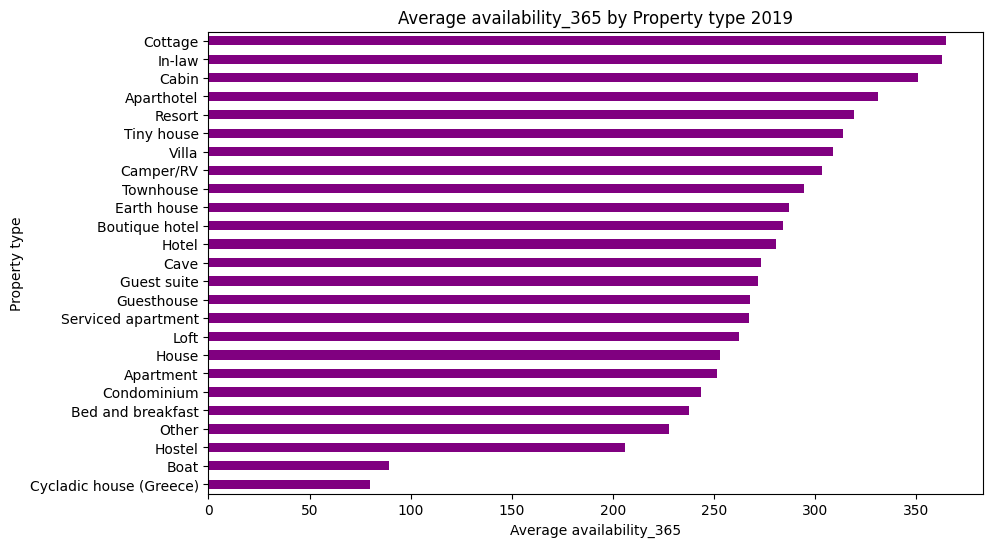

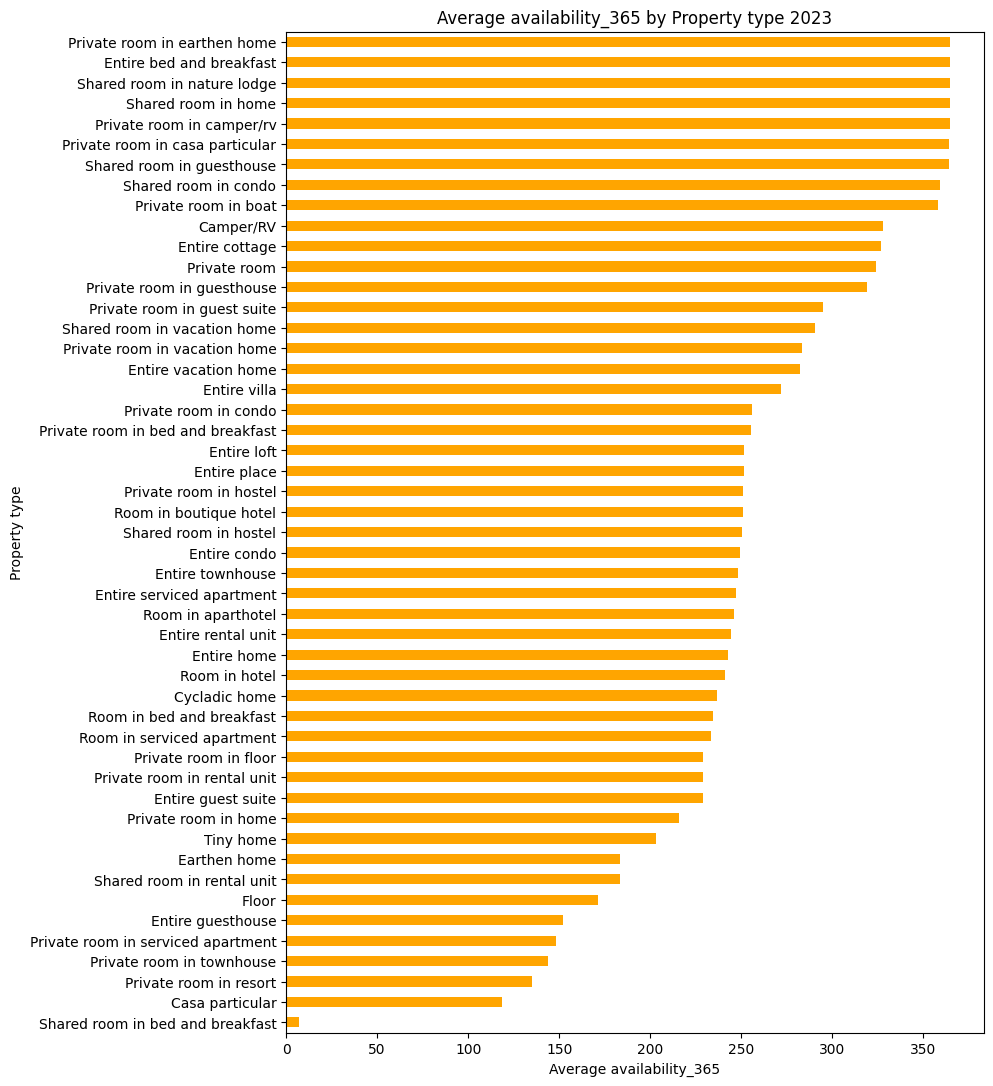

In [30]:
# Ερώτημα 1.13a

#a) Ποια property_types έχουν μεγαλύτερο availability_365 κατα μέσο όρο

#2019

#Χρήση νέου dataframe για αυτό το ερώτημα
df_2019_av = df_2019.copy()

#Αφαίρεση των γραμμών με availability_365 = 0
df_2019_av = df_2019_av.drop(df_2019_av[df_2019_av['availability_365'] == 0].index)

#Υπολογισμός μέσου availability_365 ανα property_type
mean_2019 = df_2019_av.groupby('property_type')['availability_365'].mean()

#Ταξινόμηση ανά μέση τιμή
sorted = mean_2019.sort_values()

#Κατασκευή γραφήματος
plt.figure(figsize=(10, 6))
sorted.plot(kind='barh',color='purple')
plt.title('Average availability_365 by Property type 2019')
plt.ylabel('Property type')
plt.xlabel('Average availability_365')
plt.xticks(rotation=0)
plt.show()

#2023

#Χρήση νέου dataframe για αυτό το ερώτημα
df_2023_av = df_2023.copy()

#Αφαίρεση των γραμμών με availability_365 = 0
df_2023_av = df_2023_av.drop(df_2023_av[df_2023_av['availability_365'] == 0].index)

#Υπολογισμός μέσου availability_365 ανα property_type
mean_2023 = df_2023_av.groupby('property_type')['availability_365'].mean()

#Ταξινόμηση ανά μέση τιμή
sorted = mean_2023.sort_values()

#Κατασκευή γραφήματος
plt.figure(figsize=(10, 6))
sorted.plot(kind='barh',color='orange',figsize=(9,13))
plt.title('Average availability_365 by Property type 2023')
plt.ylabel('Property type')
plt.xlabel('Average availability_365')
plt.xticks(rotation=0)
plt.show()


Percentage of airbnbs with verfied hosts that are instantly bookable in 2019: 64.92434662998625 %


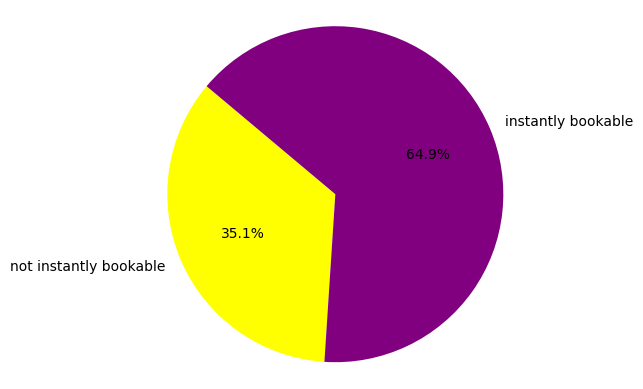

Percentage of airbnbs with verfied hosts that are instantly bookable in 2023: 63.96267049533381 %


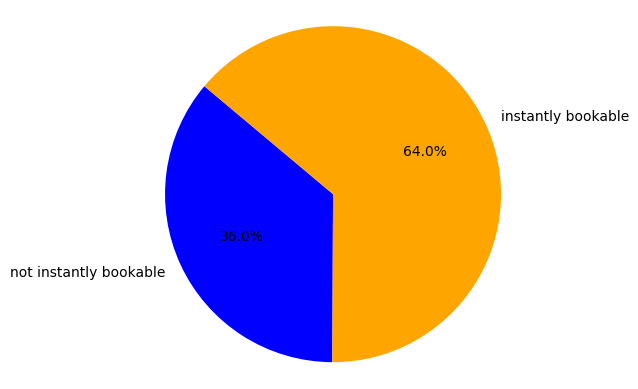

In [31]:
# Ερώτημα 1.13b

#b)Τι ποσοστό καταλυμάτων που έχουν verfied hosts έχουν instant_bookable = true (δηλαδή κράτηση χωρίς αναμονή για επιβεβαίωση από τον host)

#2019
df = df_2019.copy()
df = df.drop_duplicates(subset='id') #Κρατάμε τα μοναδικά ids
df = df[df['host_identity_verified']=='t'] #Κρατάμε μόνο όσα έχουν verified host
ver_id = len(df)

df = df[df['instant_bookable']=='t']
inst_book = len(df)

per = inst_book*100/ver_id
print('Percentage of airbnbs with verfied hosts that are instantly bookable in 2019:',per,'%')

#Δημιουργία pie chart
sizes = [100-per, per]
labels = ['not instantly bookable', 'instantly bookable']
colors = ['yellow', 'purple']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

#2023
df = df_2023.copy()
df = df.drop_duplicates(subset='id') #Κρατάμε τα μοναδικά ids
df = df[df['host_identity_verified']=='t'] #Κρατάμε μόνο όσα έχουν verified host
ver_id = len(df)

df = df[df['instant_bookable']=='t']
inst_book = len(df)

per = inst_book*100/ver_id
print('Percentage of airbnbs with verfied hosts that are instantly bookable in 2023:',inst_book*100/ver_id,'%')

#Δημιουργία pie chart
sizes = [100-per, per]
labels = ['not instantly bookable', 'instantly bookable']
colors = ['blue', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()



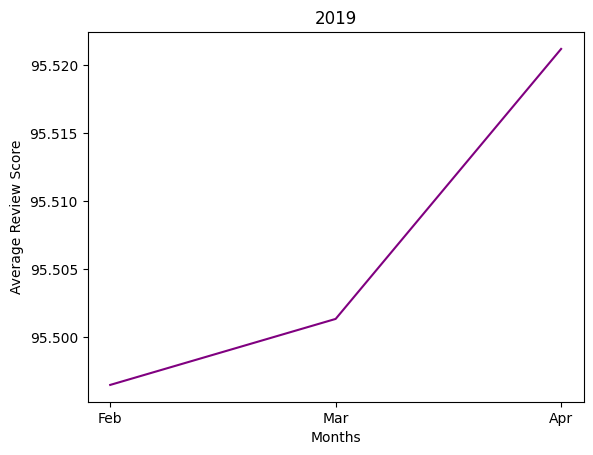

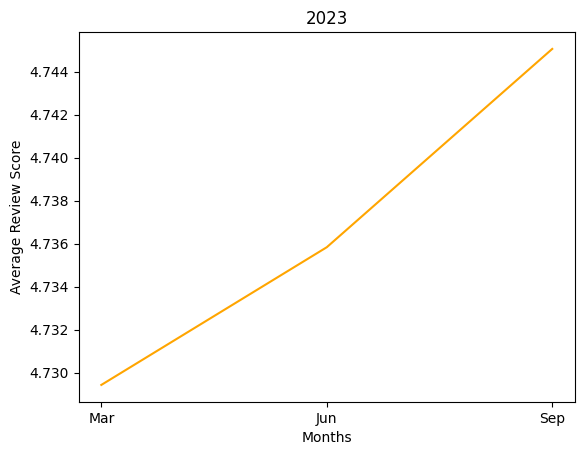

In [32]:
# Ερώτημα 1.13c

#c) Ποια ήταν η πορεία του Review_scores_rating ανά μήνα κατά μέσο όρο

#2019

avg_review_score_per_month = df_2019.groupby('month')['review_scores_rating'].mean()

x_values = ['Feb', 'Mar', 'Apr']
y_values = [avg_review_score_per_month[1], avg_review_score_per_month[2], avg_review_score_per_month[0]]

plt.plot(x_values, y_values,color='purple')

plt.xlabel('Months')
plt.ylabel('Average Review Score')
plt.title('2019')

plt.show()

#2023

avg_review_score_per_month = df_2023.groupby('month')['review_scores_rating'].mean()

x_values = ['Mar', 'Jun', 'Sep']
y_values = [avg_review_score_per_month[1], avg_review_score_per_month[0], avg_review_score_per_month[2]]

plt.plot(x_values, y_values,color='orange')

plt.xlabel('Months')
plt.ylabel('Average Review Score')
plt.title('2023')

plt.show()


In [33]:
# Ερώτημα 1.14

#2019

#Δημιουργία dataframe από το αρχείο listings0.csv
keywords = ['id', 'host_id']

feb2019 = pd.read_csv('/content/drive/MyDrive/data/2019/febrouary/listings0.csv', usecols=keywords)
mar2019 = pd.read_csv('/content/drive/MyDrive/data/2019/march/listings0.csv', usecols=keywords)
apr2019 = pd.read_csv('/content/drive/MyDrive/data/2019/april/listings0.csv', usecols=keywords)

months2019 = []
months2019.append(feb2019)
months2019.append(mar2019)
months2019.append(apr2019)

listings02019 = pd.concat(months2019, ignore_index=True)

num_host_listings = listings02019.groupby('host_id')['id'].nunique()

df = pd.DataFrame(num_host_listings)

print(df)


#2023

#Δημιουργία dataframe από το αρχείο listings0.csv
keywords = ['id', 'host_id']

mar2023 = pd.read_csv('/content/drive/MyDrive/data/2023/march/listings0.csv', usecols=keywords)
jun2023 = pd.read_csv('/content/drive/MyDrive/data/2023/june/listings0.csv', usecols=keywords)
sep2023 = pd.read_csv('/content/drive/MyDrive/data/2023/september/listings0.csv', usecols=keywords)

months2023 = []
months2023.append(mar2023)
months2023.append(jun2023)
months2023.append(sep2023)

listings02023 = pd.concat(months2023, ignore_index=True)

num_host_listings = listings02023.groupby('host_id')['id'].nunique()

df = pd.DataFrame(num_host_listings)

print(df)


           id
host_id      
37177       8
43566       2
58146       1
70840       1
109363      2
...        ..
255181419   1
255236958   2
255343893   1
255355237   1
255359259   1

[6062 rows x 1 columns]
           id
host_id      
1805        1
37177       7
70840       1
102433      1
109363      1
...        ..
521347468   1
521385938   1
521581875   2
521651152   1
521713163   1

[5883 rows x 1 columns]


Ερώτημα 1.15 <br>

**Βάση των αποτελεσμάτων προκύπτουν τα εξής συμπεράσματα:**<br>

1)Το 2023 προστέθηκε ένας νέος τύπος δωματίου τα Hotel rooms σε ένα μικρό ποσοστό. Επιπλέον φαίνεται ότι και τις δύο χρονίες ο πιο συχνός τύπος δωματίου με μεγάλη διαφορά είναι το Entire home/apt και μάλιστα υπήρχαν αρκετές νέες προσθήκες το 2023 σε σχέση με το 2019.
<br>
2) Παρατηρώντας τα ιστογράμματα για τις τιμές φαίνεται ότι το 2023 υπήρξε σημαντική αύξηση καθώς οι τιμές ξεπερνούν τα 100 ευρώ σε κάποιες περιπτώσεις και γενικότερα παραμένουν πάνω από 60 που ήταν το όριο του 2019.
<br>
3) Οι 3 γειτονιές με τις περισσότερες κριτιές παραμένουν ίδιες μεταξύ των δύο ετών (Πλάκα, Κουκάκι, Νέος Κόσμος) και διατηρούν την 1η, 2η και 3η συνολική θέση αντίστοιχα, όμως στο 2023 έχει αυξηθεί το συνολικό πλήθος των reviews.
<br>
4) Η Πλάκα παραμένει και στις δύο χρονιές ως η γειτονιά με τις περισσότερες καταχωρήσεις ακινήτων.
<br>
5, 6) Το 2023 έχει αυξηθεί αρκετα το σύνολο των γειτονιών με διαθέσιμα ακίνητα.
<br>
7) Αντίστοιχα συμπεράσματα με το 1)
<br>
8) Φαίνεται πως οι τιμές των Entire home/apt και Private room έχουν αυξηθεί το 2023 σε αντίθεση με το Shared room του οποίου οι τιμές έπεσαν. Το Hotel room (που υπάρχει μόνο το 2023) έχει τις υψηλότερες τιμές.
<br>
9) Δεν υπάρχουν σχόλια/συγκρίσεις.
<br>
10) Δεν υπάρχουν σχόλια/συγκρίσεις.
<br>
11) Δεν υπάρχουν σχόλια/συγκρίσεις.
<br>
12) Το 2019 η κατηγορία με τις περισσότερες γειτονιές είναι αυτή με τις "μέτριες" όσον αφορά την τιμή, ενώ το 2023 οι περισσότερες γειτονιές βρίσκονται στην κατηγορία "οικονομικές".
<br>
13a) Δεν υπάρχουν σχόλια/συγκρίσεις.
<br>
13b) Και στις δύο χρονιές, το ποσοστό των ακινήτων που έχουν verified host και είναι instantly bookable είναι πολύ παρόμοιο.
<br>
13c) Αν και δεν συγκρίνουμε τους ίδιους μήνες στα δύο έτη, φαίνεται πως ο μέσος όρος του review score αυξάνεται με την πάροδο του χρόνου.
<br>
14) Δεν υπάρχουν σχόλια/συγκρίσεις.

In [34]:
# Ερώτημα 2 - Recommendation System
# Το υλοποιούμε μόνο για το 2019 (σύμφωνα με συζήτηση στο Eclass)

#Εκκαθάριση δεδομένων

#Αντικατάσταση NaN με NULL
df_2019['description'] = df_2019['description'].fillna("NULL")
df_2019['name'] = df_2019['name'].fillna("NULL")

#Αφαίρεση των γραμμών που περιέχουν ελληνικούς χαρακτήρες
def contains_greek_chars(text):
  greek_chars = set('αβγδεζηθικλμνξοπρστυφχψωΑΒΓΔΕΖΗΘΙΚΛΜΝΞΟΠΡΣΤΥΦΧΨΩ')
  return any(char in greek_chars for char in text)

df_2019_filtered = df_2019[~(df_2019['description'].apply(contains_greek_chars) | df_2019['name'].apply(contains_greek_chars))]

#Αφαίρεση non utf χαρακτήρων
df_2019_filtered = df_2019_filtered[~df_2019_filtered['description'].str.contains(r'[^a-zA-Z\s]', regex=True)]
df_2019_filtered = df_2019_filtered[~df_2019_filtered['name'].str.contains(r'[^a-zA-Z\s]', regex=True)]

#Ορισμός νέου dataframe
df_rec_sys = df_2019_filtered[['id','name','description']]

#Αφαίρεση διπλοτύπων
df_rec_sys_copy = df_rec_sys.copy()
df_rec_sys_copy.drop_duplicates(subset=['id'], inplace=True)
df_rec_sys = df_rec_sys_copy.copy()

#Συγχώνευση των στηλών
def concatenate_columns(row):
  return row['name'] + ' ' + row['description']

df_rec_sys['concatenated'] = df_rec_sys.apply(lambda row: concatenate_columns(row), axis=1)

# Αφαιρούμε των χωριστών στηλών name και description
df_rec_full = df_rec_sys.copy() # Το χρειαζόμαστε για την υλοποίηση της συνάρτησης recommend()
df_rec_sys = df_rec_sys.drop(columns=['name', 'description'])


In [ ]:
# Ερώτημα 2 - Recommendation System - Συνέχεια

from sklearn.feature_extraction.text import TfidfVectorizer

#Μετατροπή όλους τους χαρακτήρες σε πεζούς χαρακτήρες και διαχωρισμός του σε λέξεις
df_rec_sys['concatenated'] = df_rec_sys['concatenated'].astype(str).apply(lambda x: ' '.join(re.findall(r'\w+', x.lower())))

# Εφαρμογή TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(df_rec_sys['concatenated'])

# Δημιουργία DataFrame από το TF-IDF matrix
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Πίνακας που εμφανίζει την συχνότητα των λέξεων σε κάθε γραμμή του df_rec_sys σε τιμές από 0 μέχρι 1
print(tfidf_df)


In [ ]:
import nltk
import pickle
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


nltk.download('stopwords')
stop_words = stopwords.words('english')

#TF-IDF για τα unigrams:


# Ερώτημα 2.1
tfidf_vectorizer_unigram = TfidfVectorizer(max_df=1.0, min_df=0, max_features=1000, ngram_range=(1, 1), stop_words='english')
tfidf_unigram = tfidf_vectorizer_unigram.fit_transform(df_rec_sys['concatenated'])
tfidf_unigram = tfidf_unigram.toarray()

# Ερώτημα 2.2
similarity_matrix = cosine_similarity(tfidf_unigram)

# Αρχικοποίηση του dictionary που θα κρατήσει τα 100 πιο όμοια ακίνητα.
most_similar_properties = {}

for i, row in enumerate(similarity_matrix):
  # Ταξινόμηση των 100 πιο όμοιων ακινήτων για κάθε ακίνητο:
  most_similar_indices = row.argsort()[-101:-1][::-1]
  # Αποθήκευση των 100 (id, similarity values) για κάθε ακίνητο:
  most_similar_properties[df_rec_sys.iloc[i]['id']] = [(df_rec_sys.iloc[index]['id'], row[index]) for index in most_similar_indices]

# Ερώτημα 2.3
def recommend(id, N):
  if id not in most_similar_properties:
    return "Property not found in the similarity dictionary"
  similar_properties = most_similar_properties[id][:N]
  print("Recommending 5 listings similar to", df_rec_full.loc[df_rec_full['id'] == id]['name'].iloc[0])
  print("---------------------------------------------------------")
  for id_sim, sim in similar_properties:
    print("Recommended:", df_rec_full.loc[df_rec_full['id'] == id_sim]['name'].iloc[0])
    print("Description:", df_rec_full.loc[df_rec_full['id'] == id_sim]['description'].iloc[0])
    print("(score:", sim, ")")
    print()

In [37]:
# Παράδειγμα εκτέλεσης του 2.3
id = 5709843
N = 10
recommend(id, N)

Recommending 5 listings similar to room for a guest
---------------------------------------------------------
Recommended: guest room in athens with private entry
Description: NULL
(score: 0.3079185546499943 )

Recommended: room with view
Description: Room with view
(score: 0.2916064064892889 )

Recommended: green room
Description: NULL
(score: 0.21141816828493257 )

Recommended: basic room
Description: Simple room with comfortable bed in the city center
(score: 0.2111800153341994 )

Recommended: safari room athens
Description: NULL
(score: 0.2009484824506964 )

Recommended: athens room one with bath
Description: NULL
(score: 0.2009484824506964 )

Recommended: charming room in the center of athens
Description: NULL
(score: 0.18429934327088862 )

Recommended: private room at the park
Description: NULL
(score: 0.17234677587826736 )

Recommended: shiny shared room
Description: NULL
(score: 0.16290441761603439 )

Recommended: athens apartment
Description: blu shine room
(score: 0.154725755

In [38]:
#TF-IDF για τα bigrams:

# Ερώτημα 2.1
tfidf_vectorizer_unigram = TfidfVectorizer(max_df=1.0, min_df=0, max_features=1000, ngram_range=(2, 2), stop_words='english')
tfidf_unigram = tfidf_vectorizer_unigram.fit_transform(df_rec_sys['concatenated'])
tfidf_unigram = tfidf_unigram.toarray()

# Ερώτημα 2.2
similarity_matrix = cosine_similarity(tfidf_unigram)

# Αρχικοποίηση του dictionary που θα κρατήσει τα 100 πιο όμοια ακίνητα.
most_similar_properties = {}

for i, row in enumerate(similarity_matrix):
  # Ταξινόμηση των 100 πιο όμοιων ακινήτων για κάθε ακίνητο:
  most_similar_indices = row.argsort()[-101:-1][::-1]
  # Αποθήκευση των 100 (id, similarity values) για κάθε ακίνητο:
  most_similar_properties[df_rec_sys.iloc[i]['id']] = [(df_rec_sys.iloc[index]['id'], row[index]) for index in most_similar_indices]

# Ερώτημα 2.3
def recommend(id, N):
  if id not in most_similar_properties:
    return "Property not found in the similarity dictionary"
  similar_properties = most_similar_properties[id][:N]
  print("Recommending 5 listings similar to", df_rec_full.loc[df_rec_full['id'] == id]['name'].iloc[0])
  print("---------------------------------------------------------")
  for id_sim, sim in similar_properties:
    print("Recommended:", df_rec_full.loc[df_rec_full['id'] == id_sim]['name'].iloc[0])
    print("Description:", df_rec_full.loc[df_rec_full['id'] == id_sim]['description'].iloc[0])
    print("(score:", sim, ")")
    print()

In [39]:
# Παράδειγμα εκτέλεσης του 2.3
id = 13147142
N = 10
recommend(id, N)

Recommending 5 listings similar to private house center of athens
---------------------------------------------------------
Recommended: center of athens
Description: NULL
(score: 0.07117736549154696 )

Recommended: athenian luxury house
Description: Athenian House close to the city center
(score: 0.0448907110537766 )

Recommended: zeus apartment
Description: Veryclose to Omonia Square and to metro station
(score: 0.0418854461342471 )

Recommended: vintage apartment at the center of athens
Description: NULL
(score: 0.03993303703672244 )

Recommended: charming room in the center of athens
Description: NULL
(score: 0.03880673206872103 )

Recommended: a sunny corner in the center of athens
Description: NULL
(score: 0.03880673206872103 )

Recommended: a quiet haven in the center of athens
Description: NULL
(score: 0.03880673206872103 )

Recommended: an oasis of tranquility in center athens
Description: NULL
(score: 0.03880673206872103 )

Recommended: orange pink dollhouse brand new center 

In [40]:
# Ερώτημα 2.4

import nltk
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Χωρίζουμε σε tokens, μετατρέπουμε σε πεζά και αφαιρούμε τα stopwords
word_pairs = df_rec_sys['concatenated'].apply(lambda x: [word for word in nltk.word_tokenize(x) if word.lower() not in nltk.corpus.stopwords.words('english')])

# Δημιουργία BigramCollocationFinder
bigram_finder = BigramCollocationFinder.from_documents(word_pairs)

# Υπολοσμός bigram scores
bigram_scores = bigram_finder.score_ngrams(BigramAssocMeasures.likelihood_ratio)

# Παίρνουμε τις 10 λέξεις που “τείνουν” να εμφανίζονται συχνά μαζί
top_bigrams = bigram_scores[:10]

for bigram, score in top_bigrams:
  print(bigram, score)

('city', 'center') 28.111679185338488
('metro', 'station') 24.002670011395576
('big', 'veranda') 23.17211073472544
('boutique', 'style') 23.17211073472544
('modern', 'pagkrati') 21.446018300015027
('kolonaki', 'elegant') 20.26107907440175
('good', 'stay') 19.356225726321878
('tzireon', 'luxury') 19.353025724956836
('cozy', 'bright') 17.633338421188434
('appartment', 'koukaki') 17.63333842118843
